# Chapter 8: CNN Auto Encoder

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/LDS8_K275_ONLINE_NGUYENTHIKIMHOANG/Week_4/Chapter8

/content/drive/MyDrive/LDS8_K275_ONLINE_NGUYENTHIKIMHOANG/Week_4/Chapter8


In [3]:
 import warnings 
 warnings.filterwarnings('ignore')

In [4]:
from IPython.display import Image, SVG 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D 
from tensorflow.keras.layers import UpSampling2D, Flatten, Reshape 
from tensorflow.keras import regularizers

In [5]:
# Loads the training and test data sets (ignoring class labels)
(x_train, _), (x_test, _) = mnist.load_data()
# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value 
x_test = x_test.astype('float32') / max_value

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
 x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
np.prod(x_train.shape[1:])

784

In [13]:
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

In [14]:
 (x_train.shape, x_test.shape)

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [16]:
# Deep Autoencoder
autoencoder = Sequential()
# Encoder Layers
autoencoder.add(Conv2D(16, (3, 3), activation='relu',
                       padding='same',
                       input_shape=x_train.shape[1:])) # [28,28]
autoencoder.add(MaxPooling2D((2, 2), padding='same')) #[14,14]
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same')) # [7, 7]
autoencoder.add(Conv2D(8, (3, 3), strides=(2,2),activation='relu', padding='same')) #[4,4]
# Flatten encoding for visualization
autoencoder.add(Flatten())
# https://keras.io/layers/core/
autoencoder.add(Reshape((4, 4, 8))) # Reshapes an output to a certain shape.
# Decoder Layers
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
# https://keras.io/layers/convolutional/
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)              

In [ ]:
# dense_1 = input*output + bias = 784 * 32 + 32 = 25120 # encode
# dense_2 = input*output + bias = 32 * 784 + 784 = 25872 # decode

In [17]:
# Xem thử 784 đưa vào thì còn lại 32, xem xem 32 ở encoder là cái gì, ko thật cần thiết khi chạy mô hình
# Encoder Model
encoder = Model(inputs=autoencoder.input,
outputs = autoencoder.get_layer('flatten').output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 8)           584   

In [18]:
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 
# Unsupervised learning
#autoencoder.fit(x_train, x_train,
#                epochs=50,
#                batch_size=256,
#                shuffle=True, # xáo trộn dữ liệu huấn luyện mỗi epoch 
#                validation_data=(x_test, x_test))

In [19]:
# trong truong hop thuc thi lau, can co checkpoint
# define the checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve any
early_stopping_monitor = EarlyStopping(patience=10)
filepath = "cnn_auto_model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss',
verbose=1,

save_best_only=True,
mode='min')

callbacks_list = [checkpoint, early_stopping_monitor]
# Train the model
# autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_siz
# epochs=epochs,verbose=1,validation_data=(va
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
epochs=100,
batch_size=128,
validation_data=(x_test, x_test),
callbacks=callbacks_list)

Epoch 1/100
469/469 [==============================] - ETA: 0s - loss: 0.2186
Epoch 1: loss improved from inf to 0.21862, saving model to cnn_auto_model.h5
469/469 [==============================] - 17s 9ms/step - loss: 0.2186 - val_loss: 0.1387
Epoch 2/100
467/469 [============================>.] - ETA: 0s - loss: 0.1284
Epoch 2: loss improved from 0.21862 to 0.12836, saving model to cnn_auto_model.h5
469/469 [==============================] - 4s 8ms/step - loss: 0.1284 - val_loss: 0.1191
Epoch 3/100
468/469 [============================>.] - ETA: 0s - loss: 0.1151
Epoch 3: loss improved from 0.12836 to 0.11506, saving model to cnn_auto_model.h5
469/469 [==============================] - 3s 7ms/step - loss: 0.1151 - val_loss: 0.1093
Epoch 4/100
467/469 [============================>.] - ETA: 0s - loss: 0.1082
Epoch 4: loss improved from 0.11506 to 0.10823, saving model to cnn_auto_model.h5
469/469 [==============================] - 3s 7ms/step - loss: 0.1082 - val_loss: 0.1050
Epoch 5

In [20]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images) # trong

encoded_imgs = encoder.predict(x_test) 
decoded_imgs = autoencoder.predict(x_test)

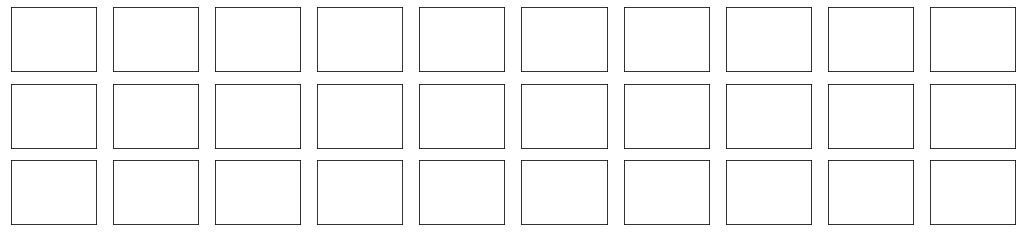

In [21]:
plt.figure(figsize=(18, 4))
for i, image_idx in enumerate(random_test_images):
  # plot original image
  ax = plt.subplot(3, num_images, i + 1) # in hinh tren dong 1 plt.imshow(x_test[image_idx].reshape(28, 28)) # tra lai hinh dang ban dau ch plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # plot encoded image
  ax = plt.subplot(3, num_images, num_images + i + 1) # in hinh tren dong 2 plt.imshow(encoded_imgs[image_idx].reshape(8, 4)) # hinh dang co chai 8 * 4 plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # plot reconstructed image
  ax = plt.subplot(3, num_images, 2*num_images + i + 1) # in hinh tren dong 3 plt.imshow(decoded_imgs[image_idx].reshape(28, 28)) # tra lai hinh dang cua plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [22]:
# save model
autoencoder.save('decoder_cnn.h5') 
#print("save!!!")

In [25]:
 encoder.save('encoder_cnn.h5')

In [26]:
# o mot noi nao do...
# Predicting on Test Data, model load from file 
from tensorflow.keras.models import load_model 
encoder = load_model('encoder_cnn.h5')
decoder = load_model('decoder_cnn.h5')

In [24]:
num_images = 5
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test) 
decoded_imgs = decoder.predict(x_test)

NameError: ignored

In [ ]:
plt.figure(figsize=(18, 4))
for i, image_idx in enumerate(random_test_images):
  # plot original image
  ax = plt.subplot(3, num_images, i + 1) 
  plt.imshow(x_test[image_idx].reshape(28, 28)) 
  plt.gray()
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False)
  # plot encoded image
  ax = plt.subplot(3, num_images, num_images + i + 1) 
  plt.imshow(encoded_imgs[image_idx].reshape(8, 4)) 
  plt.gray()
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False)
  # plot reconstructed image
  ax = plt.subplot(3, num_images, 2*num_images + i + 1) 
  plt.imshow(decoded_imgs[image_idx].reshape(28, 28)) 
  plt.gray()
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
 # Link: # https://ramhiser.com/post/2018-05-14-autoencoders-with-keras/

In [ ]:
for i, image_idx in enumerate(random_test_images):
  # plot reconstructed image 
  plt.imshow(decoded_imgs[image_idx].reshape(28, 28)) 
  plt.gray()
  image_name = "demo_CNN/image_" + str(image_idx) + ".jpg" 
  plt.savefig(image_name)
  plt.show()